In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to split data 
from sklearn.model_selection import train_test_split, cross_validate


from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Libtune to tune model, get different metric scores
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import math
from collections import Counter

In [2]:
diabetes = pd.read_csv("/content/diabetes.csv")

In [3]:
# printing the first 5 rows of the dataset
diabetes.head()

,Sex,Glucose,HighChol,PhysActivity,BMI,Stroke,HeartDiseaseorAttack,EyeProb,BloodPressure,Age,Outcome
0,0,148,1,0,40,0,0,1,72,50,1
1,0,85,0,1,25,0,0,1,66,31,0
2,0,183,1,0,28,0,0,0,64,32,1
3,0,89,0,1,27,0,0,0,66,21,0
4,0,137,1,1,24,0,0,0,40,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sex                   768 non-null    int64
 1   Glucose               768 non-null    int64
 2   HighChol              768 non-null    int64
 3   PhysActivity          768 non-null    int64
 4   BMI                   768 non-null    int64
 5   Stroke                768 non-null    int64
 6   HeartDiseaseorAttack  768 non-null    int64
 7   EyeProb               768 non-null    int64
 8   BloodPressure         768 non-null    int64
 9   Age                   768 non-null    int64
 10  Outcome               768 non-null    int64
dtypes: int64(11)
memory usage: 66.1 KB


In [5]:
diabetes.describe()

,Sex,Glucose,HighChol,PhysActivity,BMI,Stroke,HeartDiseaseorAttack,EyeProb,BloodPressure,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.352865,120.894531,0.528646,0.621094,29.084635,0.070312,0.125000,0.467448,69.105469,33.240885,0.348958
std,0.478172,31.972618,0.499504,0.485431,6.085602,0.255840,0.330934,0.499264,19.355807,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,0.000000,99.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,62.000000,24.000000,0.000000
50%,0.000000,117.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,72.000000,29.000000,0.000000
75%,1.000000,140.250000,1.000000,1.000000,32.000000,0.000000,0.000000,1.000000,80.000000,41.000000,1.000000
max,1.000000,199.000000,1.000000,1.000000,59.000000,1.000000,1.000000,1.000000,122.000000,81.000000,1.000000


In [6]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
diabetes.groupby('Outcome').mean()

,Sex,Glucose,HighChol,PhysActivity,BMI,Stroke,HeartDiseaseorAttack,EyeProb,BloodPressure,Age
Outcome,,,,,,,,,,
0,0.356000,109.980000,0.542000,0.624000,29.198000,0.072000,0.11800,0.45,68.184000,31.190000
1,0.347015,141.257463,0.503731,0.615672,28.873134,0.067164,0.13806,0.50,70.824627,37.067164


In [8]:
diabetes.fillna(diabetes.mean())

,Sex,Glucose,HighChol,PhysActivity,BMI,Stroke,HeartDiseaseorAttack,EyeProb,BloodPressure,Age,Outcome
0,0,148,1,0,40,0,0,1,72,50,1
1,0,85,0,1,25,0,0,1,66,31,0
2,0,183,1,0,28,0,0,0,64,32,1
3,0,89,0,1,27,0,0,0,66,21,0
4,0,137,1,1,24,0,0,0,40,33,1
...,...,...,...,...,...,...,...,...,...,...,...
763,0,101,0,1,30,0,0,1,76,63,0
764,1,122,1,0,28,0,0,0,70,27,0
765,0,121,0,1,31,0,0,0,72,30,0
766,0,126,1,1,27,0,0,0,60,47,1


In [9]:
X = diabetes.drop(['Outcome'],axis=1)
y = diabetes['Outcome']

In [10]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Creating StandardScaler instance
sc = MinMaxScaler()

# Fitting Standard Scaler
X_train = sc.fit_transform(X_train)

# Scaling data
X_test = sc.transform(X_test)

In [12]:
# transform the training dataset
oversample = SMOTE(random_state=33)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [13]:
# summarize the new class distribution of the training dataset
counter = Counter(y_train)
print(counter)

Counter({0: 401, 1: 401})


In [14]:
from sklearn.model_selection import GridSearchCV

model_grid = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[10]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[10]}]),
               (SVC(),[{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf'], 'probability': [True]}]),
               (KNeighborsClassifier(),[{'n_neighbors' : [1]}]),
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[10]}])]

In [15]:
for i,j in model_grid:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    best_estimator = grid.best_estimator_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('Best Estimators : ',best_estimator)

LogisticRegression():
Best Accuracy : 74.19%
Best Parameters :  {'C': 1, 'random_state': 10}
Best Estimators :  LogisticRegression(C=1, random_state=10)
GaussianNB():
Best Accuracy : 70.20%
Best Parameters :  {'var_smoothing': 1e-09}
Best Estimators :  GaussianNB()
DecisionTreeClassifier():
Best Accuracy : 74.44%
Best Parameters :  {'criterion': 'gini', 'random_state': 10}
Best Estimators :  DecisionTreeClassifier(random_state=10)
SVC():
Best Accuracy : 77.56%
Best Parameters :  {'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True}
Best Estimators :  SVC(C=10, gamma=1, probability=True)
KNeighborsClassifier():
Best Accuracy : 74.69%
Best Parameters :  {'n_neighbors': 1}
Best Estimators :  KNeighborsClassifier(n_neighbors=1)
RandomForestClassifier():
Best Accuracy : 80.80%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 10}
Best Estimators :  RandomForestClassifier(n_estimators=200, random_state=10)


              precision    recall  f1-score   support

           0       0.83      0.73      0.77        99
           1       0.60      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154

ROC AUC score:  77.76
Accuracy Score:  72.73

Mean squared error : 0.2727272727272727

**************************************************

Root mean squared error : 0.5222329678670935


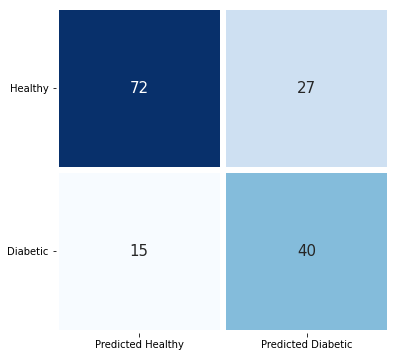

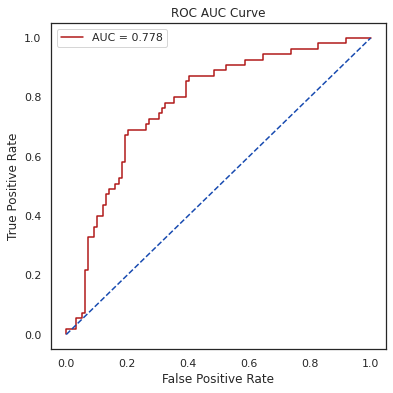

<Figure size 432x432 with 0 Axes>

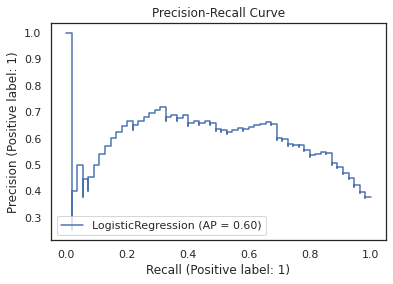

In [16]:
#Fitting Logistic Regression Model
accuracies = {}
classifier = LogisticRegression(C= 1, random_state= 142)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('ROC AUC score: ',(round(roc_auc_score(y_test, y_prob)* 100,2)))
print('Accuracy Score: ',(round(accuracy_score(y_test, y_pred)*100,2)))

print('\nMean squared error : '+ str(mean_squared_error(y_test, y_pred)))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(math.sqrt(mean_squared_error(y_test, y_pred))))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['Logistic Regression'] = acc

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        99
           1       0.72      0.76      0.74        55

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.81      0.81      0.81       154

ROC AUC score:  81.25
Accuracy Score:  81.17

Mean squared error : 0.18831168831168832

**************************************************

Root mean squared error : 0.43394894666502914


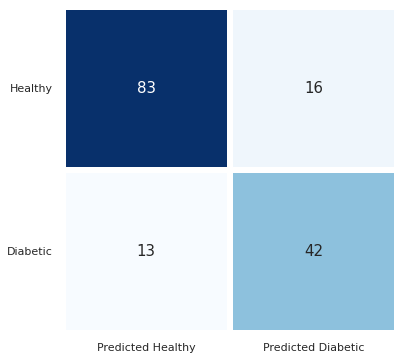

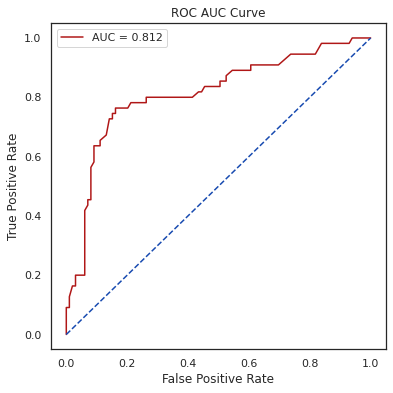

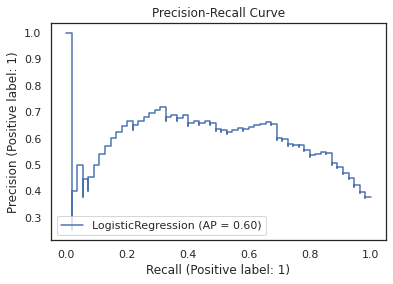

In [17]:
#Fitting RandomForestClassifier Model
classifier_r = RandomForestClassifier(n_estimators= 200,random_state= 142)
classifier_r.fit(X_train, y_train)
y_pred = classifier_r.predict(X_test)
y_prob = classifier_r.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('ROC AUC score: ',(round(roc_auc_score(y_test, y_prob)* 100,2)))
print('Accuracy Score: ',(round(accuracy_score(y_test, y_pred)*100,2)))

print('\nMean squared error : '+ str(mean_squared_error(y_test, y_pred)))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(math.sqrt(mean_squared_error(y_test, y_pred))))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['Random Forest'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        99
           1       0.58      0.73      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154

ROC AUC score:  77.06
Accuracy Score:  71.43

Mean squared error : 0.2857142857142857

**************************************************

Root mean squared error : 0.5345224838248488


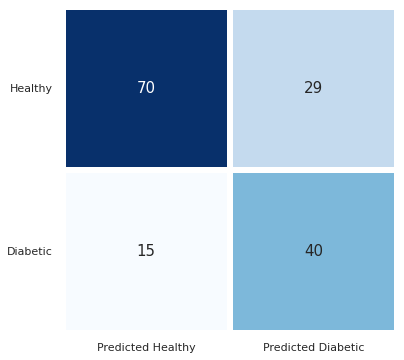

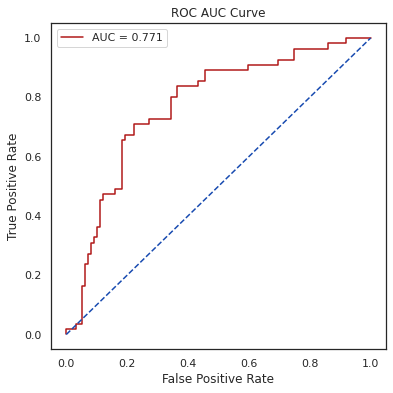

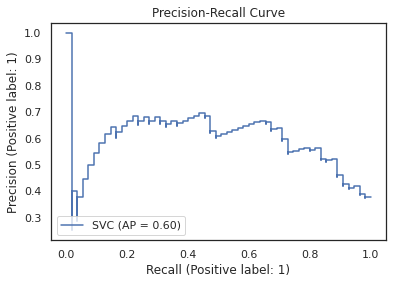

In [18]:
#Fitting SVM Model
classifier = SVC(C=100, gamma=0.01, kernel='rbf', probability=True)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('ROC AUC score: ',(round(roc_auc_score(y_test, y_prob)* 100,2)))
print('Accuracy Score: ',(round(accuracy_score(y_test, y_pred)*100,2)))

print('\nMean squared error : '+ str(mean_squared_error(y_test, y_pred)))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(math.sqrt(mean_squared_error(y_test, y_pred))))


# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['SVM'] = acc


sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

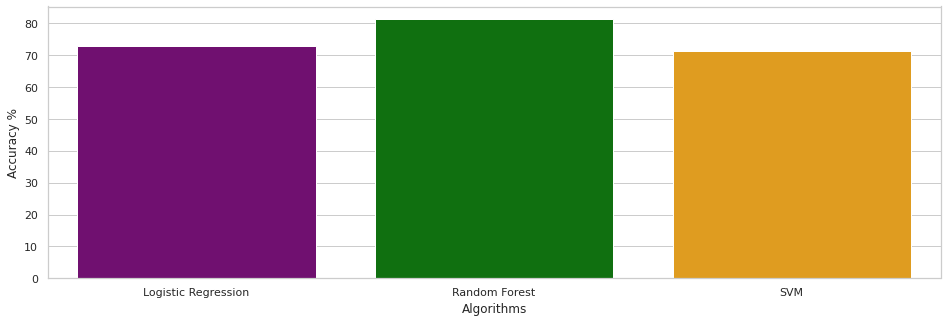

In [19]:
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [20]:
df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_accuracy.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_accuracy

,Model,Accuracy
1,Random Forest,81.168831
0,Logistic Regression,72.727273
2,SVM,71.428571


In [21]:
input_data = (0,166,1,0,30,0,0,1,50,29)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier_r.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Patient is not diabetic')
else:
  print('Patient is diabetic')

[0]
Patient is not diabetic


In [22]:
import pickle

filename = 'trained_model.sav'
pickle.dump(classifier_r, open(filename, 'wb'))

In [23]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [24]:
input_data = (0,166,1,0,30,0,0,1,50,29)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier_r.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Patient is not diabetic')
else:
  print('Patient is diabetic')

[0]
Patient is not diabetic
